In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from ydata_profiling import ProfileReport
from scipy.stats import skew
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('/kaggle/input/vehicle-sales-data/car_prices.csv')

In [29]:
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [30]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [32]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,558837.000000,547017.000000,558743.000000,558799.000000,558825.000000
mean,2010.038927,30.672365,68320.017767,13769.377495,13611.358810
std,3.966864,13.402832,53398.542821,9679.967174,9749.501628
min,1982.000000,1.000000,1.000000,25.000000,1.000000
25%,2007.000000,23.000000,28371.000000,7100.000000,6900.000000
50%,2012.000000,35.000000,52254.000000,12250.000000,12100.000000
75%,2013.000000,42.000000,99109.000000,18300.000000,18200.000000
max,2015.000000,49.000000,999999.000000,182000.000000,230000.000000


In [33]:
df['year'] = df['year'].astype(str)

In [34]:
df.describe()

,condition,odometer,mmr,sellingprice
count,547017.000000,558743.000000,558799.000000,558825.000000
mean,30.672365,68320.017767,13769.377495,13611.358810
std,13.402832,53398.542821,9679.967174,9749.501628
min,1.000000,1.000000,25.000000,1.000000
25%,23.000000,28371.000000,7100.000000,6900.000000
50%,35.000000,52254.000000,12250.000000,12100.000000
75%,42.000000,99109.000000,18300.000000,18200.000000
max,49.000000,999999.000000,182000.000000,230000.000000


## EDA

In [35]:
df.dropna(subset=['sellingprice'], inplace = True)

In [36]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                26
sellingprice        0
saledate            0
dtype: int64

In [37]:
df.dropna(subset=['mmr'], inplace = True)

In [38]:
df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65351
vin                 0
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

In [44]:
df_train = df[['mmr', 'sellingprice']]  


In [45]:
df_train = df_train[:5000]

df_train

,mmr,sellingprice
0,20500.0,21500.0
1,20800.0,21500.0
2,31900.0,30000.0
3,27500.0,27750.0
4,66000.0,67000.0
...,...,...
4995,600.0,800.0
4996,575.0,700.0
4997,2600.0,2600.0
4998,4675.0,2500.0


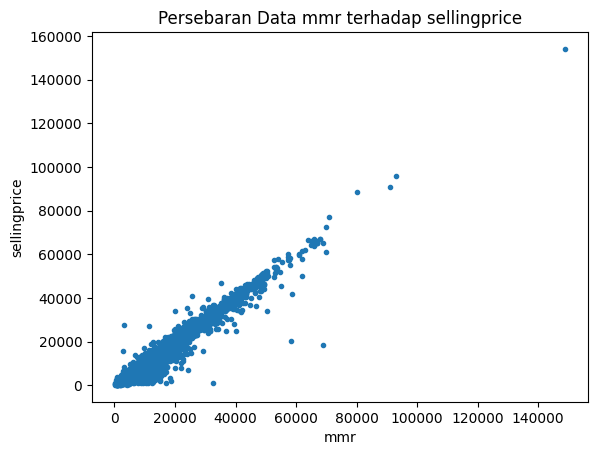

In [46]:
plt.scatter(df_train['mmr'], df_train['sellingprice'], marker='.')
plt.xlabel('mmr')
plt.ylabel('sellingprice')
plt.title('Persebaran Data mmr terhadap sellingprice')

plt.show()

In [47]:
scaler = StandardScaler()
df_train = scaler.fit_transform(df_train)

In [48]:
skewness = skew(df_train, axis=1)

skewness

array([ 0.00000000e+00, -3.64176409e-15,  0.00000000e+00, ...,
        0.00000000e+00,  2.05354854e-15,  7.52016694e-15])

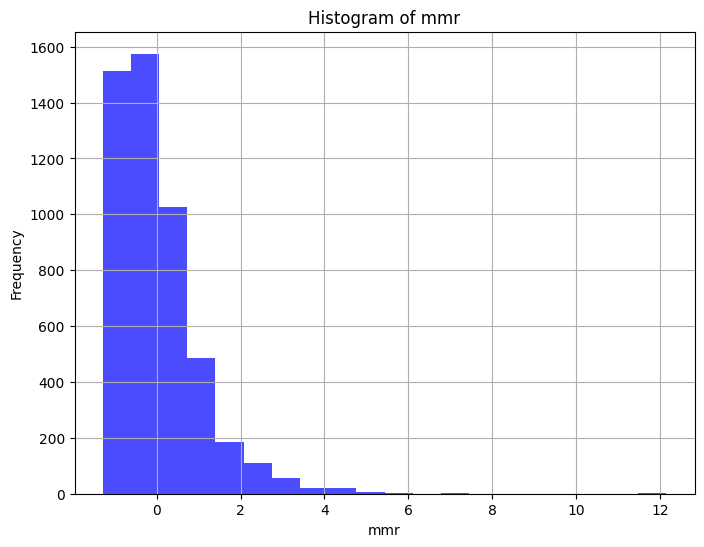

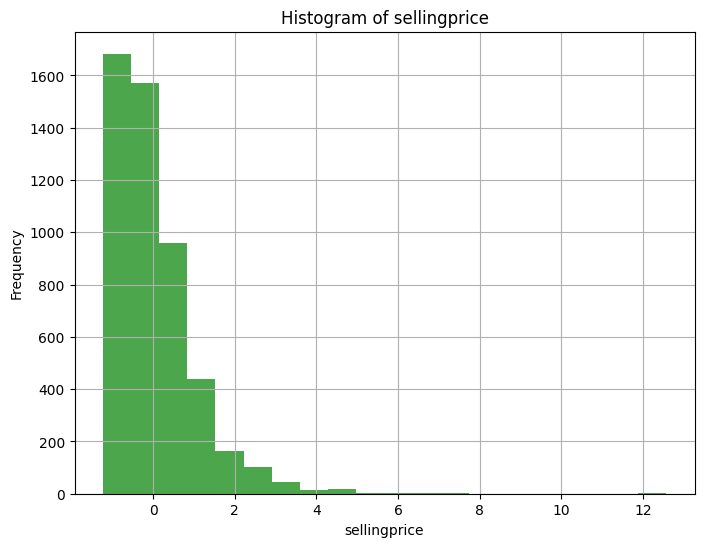

In [49]:
plt.figure(figsize=(8, 6))
plt.hist(df_train[:, 0], bins=20, color='blue', alpha=0.7)
plt.xlabel('mmr')
plt.ylabel('Frequency')
plt.title('Histogram of mmr')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(df_train[:, 1], bins=20, color='green', alpha=0.7)
plt.xlabel('sellingprice')
plt.ylabel('Frequency')
plt.title('Histogram of sellingprice')
plt.grid(True)
plt.show()

## KMeans Clustering

### Untuk Data yang digunakan untuk clustering adalah mmr dan Sellingprice

In [51]:
mmr_data = df_train

In [52]:
wcss = []
scores = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(mmr_data)
    wcss.append(kmeans.inertia_)

    labels = kmeans.labels_
    silhouette_avg = silhouette_score(mmr_data, labels)
    scores.append(silhouette_avg)
    print('wcss score for n_cluster = ' + str(i) + ' is ' + str(wcss))
    print('silhoutte score for n_clusters = ' + str(i) + ' is ' + str(silhouette_avg))

wcss score for n_cluster = 2 is [4002.6125895507384]
silhoutte score for n_clusters = 2 is 0.6026331148613943
wcss score for n_cluster = 3 is [4002.6125895507384, 2113.9551700572615]
silhoutte score for n_clusters = 3 is 0.5731895876980603
wcss score for n_cluster = 4 is [4002.6125895507384, 2113.9551700572615, 1383.1779364471954]
silhoutte score for n_clusters = 4 is 0.5303918429157042
wcss score for n_cluster = 5 is [4002.6125895507384, 2113.9551700572615, 1383.1779364471954, 995.4262815877861]
silhoutte score for n_clusters = 5 is 0.5354780461693069
wcss score for n_cluster = 6 is [4002.6125895507384, 2113.9551700572615, 1383.1779364471954, 995.4262815877861, 750.3024837690472]
silhoutte score for n_clusters = 6 is 0.5210973622398777
wcss score for n_cluster = 7 is [4002.6125895507384, 2113.9551700572615, 1383.1779364471954, 995.4262815877861, 750.3024837690472, 605.505908656344]
silhoutte score for n_clusters = 7 is 0.4937307782338341
wcss score for n_cluster = 8 is [4002.612589550

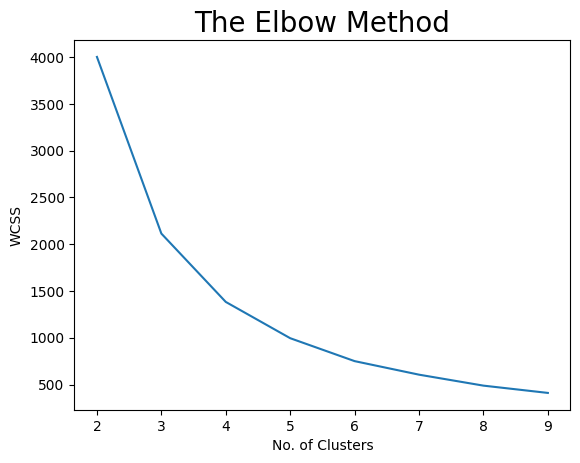

In [53]:
# Visualize Elbow Method
plt.plot(range(2, 10), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

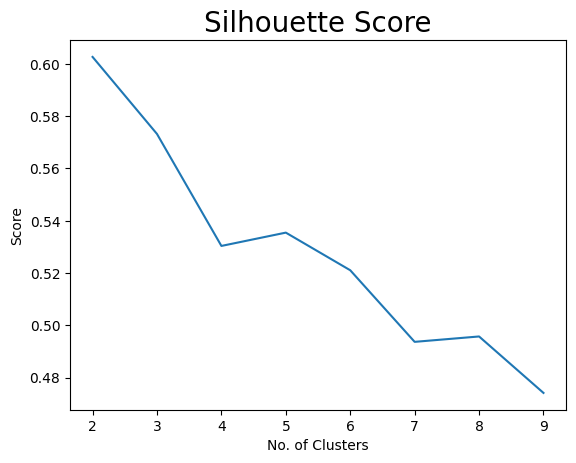

In [54]:
# visualizing Silhouette score
plt.plot(range(2, 10), scores)
plt.title('Silhouette Score', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Score')
plt.show()

Karena Silhouette scorenya tidak menunjukkan cluster mana yang optimal, maka saya akan menggunakan 3 dan 4 cluster

### Kmeans 3 Cluster

In [55]:
kmeans_1 = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init='auto', random_state=42)
y_kmeans1 = kmeans_1.fit_predict(df_train)

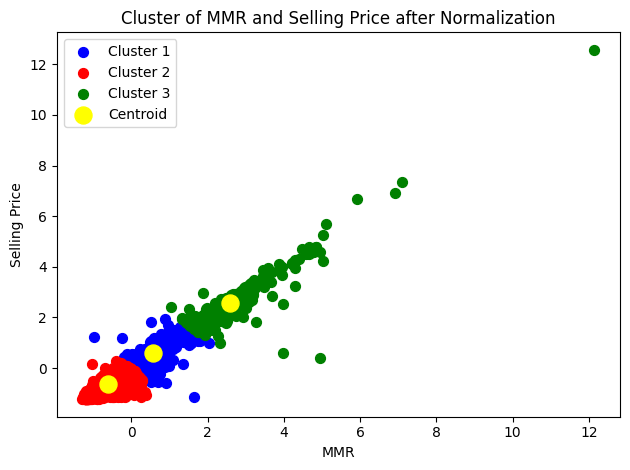

In [56]:
# Visualisasi Scatter Plot
plt.scatter(df_train[y_kmeans1 == 0, 0], df_train[y_kmeans1 == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(df_train[y_kmeans1 == 1, 0], df_train[y_kmeans1 == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(df_train[y_kmeans1 == 2, 0], df_train[y_kmeans1 == 2, 1], s=50, c='green', label='Cluster 3')

plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=150, c='yellow', label='Centroid')

plt.title('Cluster of MMR and Selling Price after Normalization')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.legend()

### Berdasarkan Kmeans di atas, dibagi menjadi 3 cluster, yaitu
#### - Cluster Merah (MMR rendah, SellingPrice rendah)
#### - Cluster Biru (MMR sedang, SellingPrice sedang)
#### - Cluster Hijau (MMR tinggi, SellingPrice tinggi)

### Kmeans 4 Cluster

In [57]:
kmeans_2 = KMeans(n_clusters=4, init="k-means++", max_iter=300, n_init='auto', random_state=42)
y_kmeans2 = kmeans_2.fit_predict(df_train)

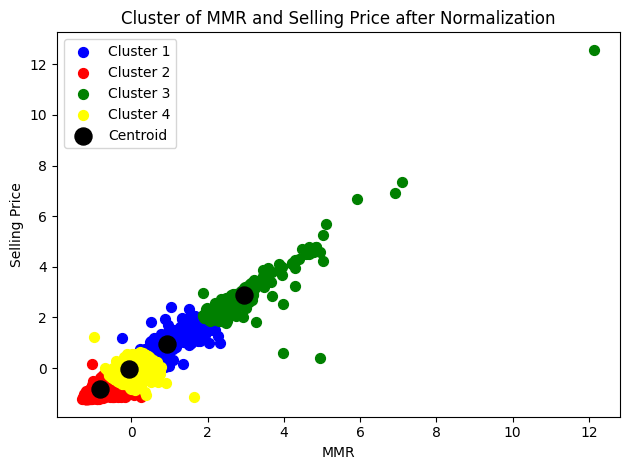

In [58]:
# Visualisasi Scatter Plot
plt.scatter(df_train[y_kmeans2 == 0, 0], df_train[y_kmeans2 == 0, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(df_train[y_kmeans2 == 1, 0], df_train[y_kmeans2 == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(df_train[y_kmeans2 == 2, 0], df_train[y_kmeans2 == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(df_train[y_kmeans2 == 3, 0], df_train[y_kmeans2 == 3, 1], s=50, c='yellow', label='Cluster 4')

plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=150, c='black', label='Centroid')

plt.title('Cluster of MMR and Selling Price after Normalization')
plt.xlabel('MMR')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.legend()

### Berdasarkan Kmeans di atas, dibagi menjadi 4 cluster, yaitu
#### - Cluster Merah (MMR sangat rendah, SellingPrice sangat rendah)
#### - Cluster Kuning (MMR rendah, SellingPrice rendah)
#### - Cluster Biru (MMR sedang, SellingPrice sedang)
#### - Cluster Hijau (MMR tinggi, SellingPrice tinggi)

# This is the end of the notebook :)